## Import

In [1]:
from metroloja_lib import coreg_analyze as ca
from metroloja_lib import psf_analyze as pa
import tkinter as tk

## Set Up

### *Select data*

OK Coreg
Images name :
Date 1
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_001
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_002
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_004
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_003
Date 2
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_001
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_002
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_004
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_003
Date 3
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_001
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_002
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_004
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_003
Date 4
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_001
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_002
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_004
   20210615_1518_Tetra1um_Quarep_ApoWF_Objx63NA14oil_003
Date 5
   20210615_1518_Tetra1um_Quar

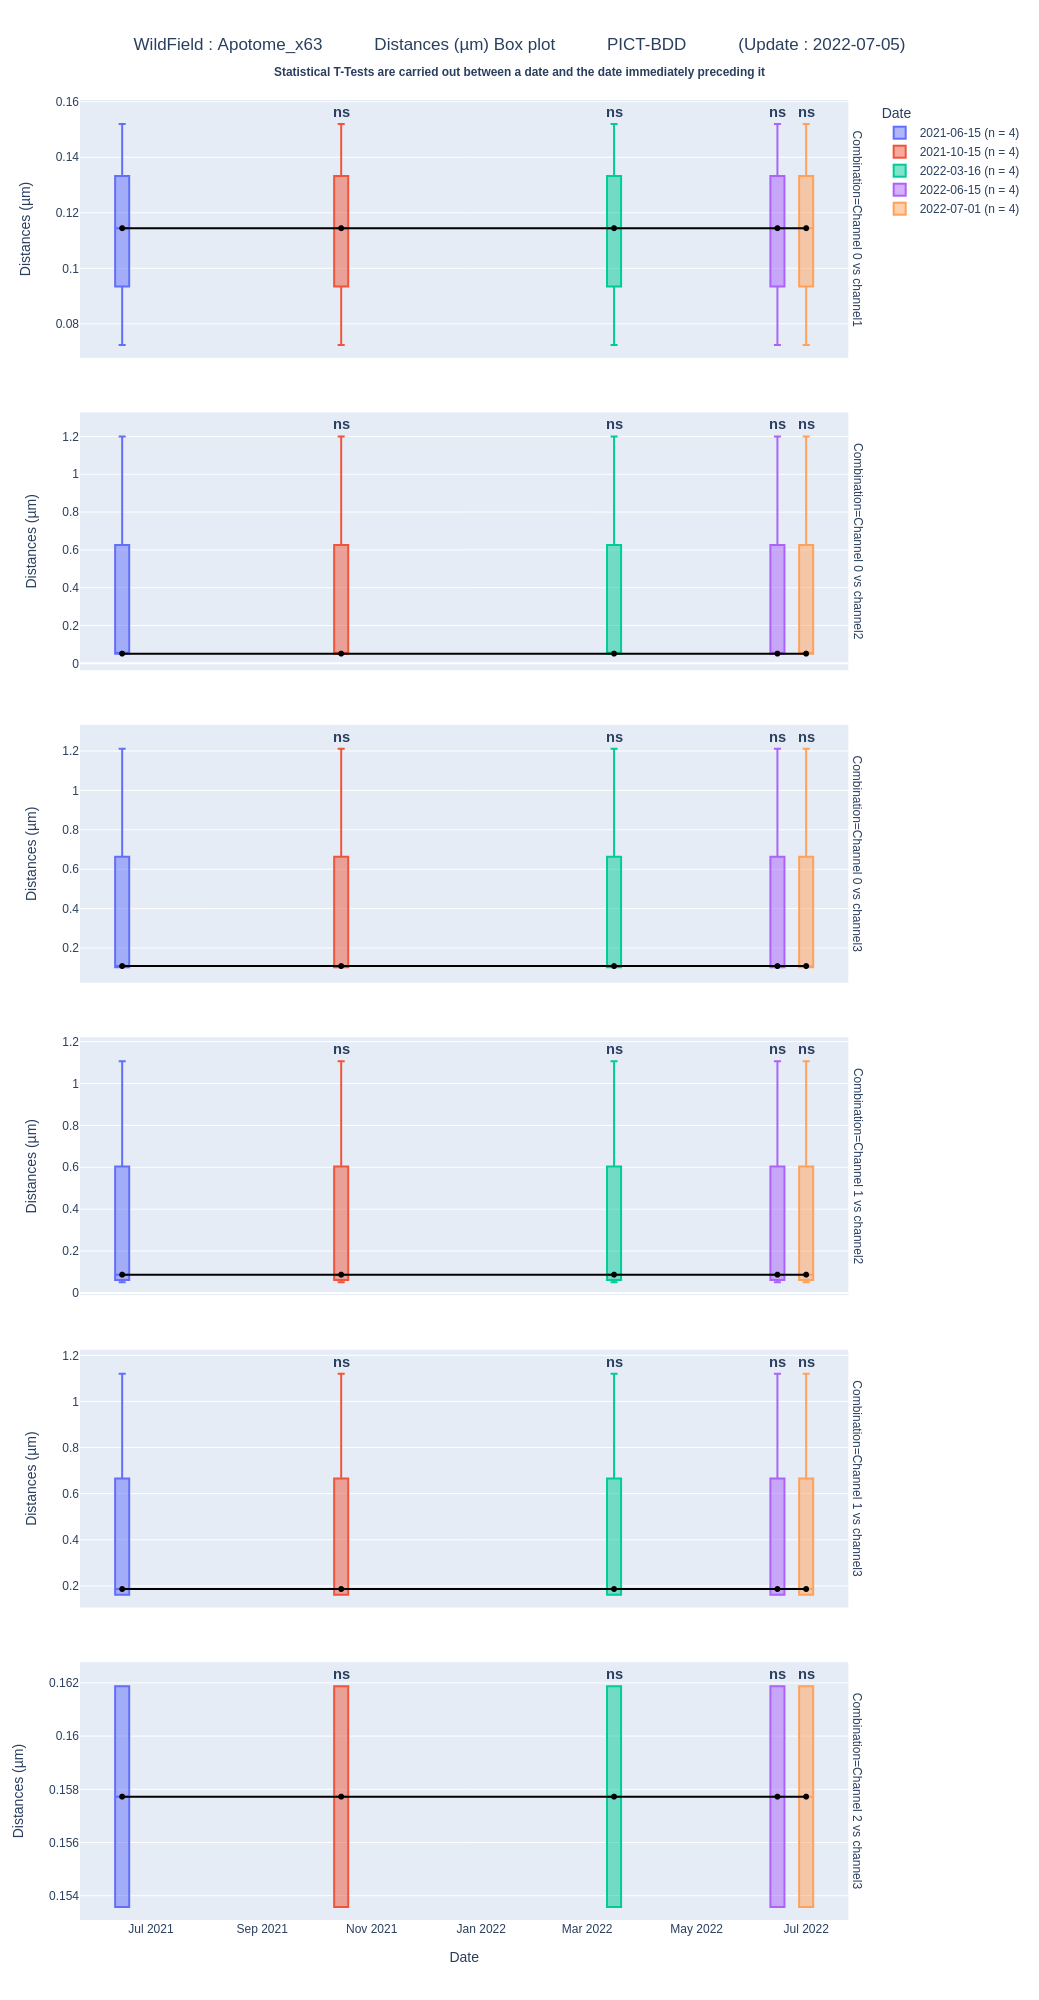

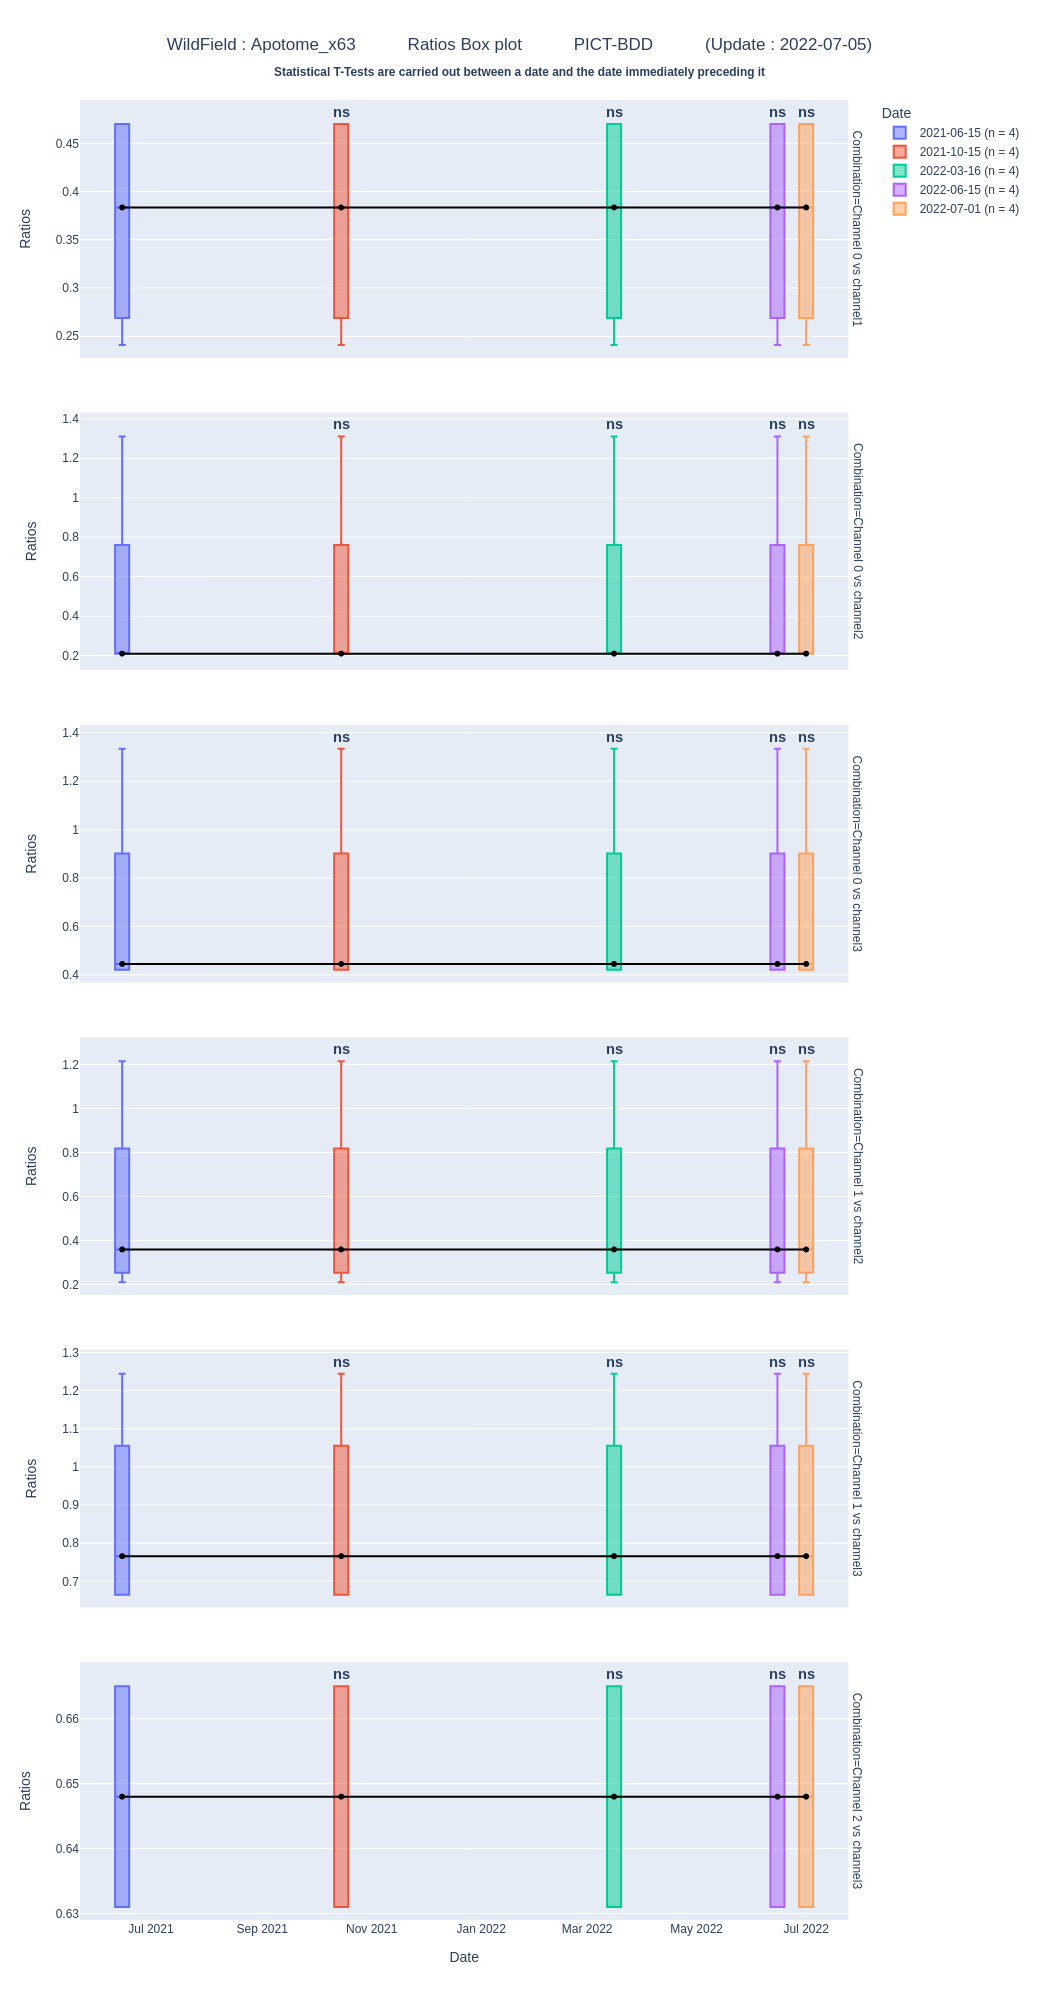



20220705_PLOT_RESULT_(3).pdf is created
PATH : /home/pictbdd/metroloj_analysis/data_test/coregistration/WildField


In [4]:
master = tk.Tk()
master.geometry("400x200")
master.title('What analyze do you want to treat ?')

v = tk.StringVar(master)

def ShowChoice():
    global which_button_is_selected
    which_button_is_selected = v.get()

values = {"Resolution" : "1",
          "Coregistration" : "2",
          "Field Homogeneity" : "3",
          "Laser Power" : "4"}

tk.Label(master, 
         text="""Choose your plot :""",
         justify = tk.LEFT,
         padx = 20).pack()


for (text, value) in values.items():
    tk.Radiobutton(master, text = text, variable = v, value = value, indicator = 0, background = "light blue", command=ShowChoice).pack(fill = tk.X, ipady = 5, anchor=tk.W)


button = tk.Button(
    master,
    text="Get Selected",
    command=master.quit)

button.pack(fill=tk.X, padx=5, pady=5)





master.mainloop()
master.destroy()

if which_button_is_selected == '1': # Résolution part
    print('OK PSF')
    
    Input_folder = pa.select_folder() # Select input folder
    print('\n')
    Processed_folder = pa.processed_path(Input_folder[0], Input_folder[1]) # Find MetroloJ_QC Processed folder
    DF = pa.convert_to_df(Processed_folder, Input_folder[1], Input_folder[2], Input_folder[3], Input_folder[4], Input_folder[0]) # Creat dataframe containing all data
    # DF[0] => dataframe for XYZ data
    # DF[1] => dataframe for SBR data
    DF_XYZ_stat = pa.XYZ_stats(DF[0]) # Stat for XYZ data
    DF_SBR_stat = pa.SBR_stats(DF[1]) # Stat for SBR data
    print('\n')
    param_selected = pa.select_param() # Select analyze parameters to plot
    pa.display_selected_plot(param_selected[1], param_selected[0], DF[0], DF[1], DF_XYZ_stat, DF_SBR_stat[0], Input_folder[0], DF_SBR_stat[1])
    


    
elif which_button_is_selected == '2': # Coregistration part
    print('OK Coreg')
    
    Input_folder = ca.select_folder() # Select input folder
    print('\n')
    Processed_folder = ca.processed_path(Input_folder[0], Input_folder[1]) # Find MetroloJ_QC Processed folder
    DF = ca.convert_to_df(Processed_folder, Input_folder[1], Input_folder[2], Input_folder[3], Input_folder[4], Input_folder[0]) # Creat dataframe containing all data
    DF_stat = ca.coreg_stats(DF[0], DF[1]) # Dataframe for all stat
    print('\n')
    param_selected = ca.select_param() # Select analyze parameters to plot
    date_liste = DF[1]['Date'].tolist()
    ca.display_selected_plot(param_selected[1], param_selected[0], DF[0], DF_stat[0], Input_folder[0], DF_stat[1], DF[2], date_liste)
    